<a href="https://colab.research.google.com/github/cosimo-schiavoni/Massive_Data_Project/blob/main/Cats_Dogs_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf './Cats_Dogs_data/test'

In [3]:
# Keras / Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
#from tensorflow.keras.optimizers import Adam

from functools import reduce
from google.colab import files
import os
import zipfile
import numpy as np

#from my model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import pickle
import shutil
import random
import skimage.io as io
from copy import deepcopy

from os import makedirs
from shutil import rmtree

import os
import zipfile
from os.path import join
from os import listdir, rmdir
from shutil import move

from PIL import Image

import os
import cv2
import imghdr
from PIL import Image

In [4]:
os.environ["data_source"] = "./Cats_Dogs_data"

if not os.path.exists(os.environ["data_source"]):
  os.makedirs(os.environ["data_source"])
  if "download" not in os.listdir():
    if "download.zip" not in os.listdir():
      ! wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
      with zipfile.ZipFile("CatsDogs.zip", 'r') as f:
        f.extractall("CatsDogs")
    os.remove("CatsDogs.zip")

!mv "./CatsDogs/CatsDogs/Cats" "./Cats_Dogs_data"
!mv "./CatsDogs/CatsDogs/Dogs" "./Cats_Dogs_data"

!rm -rf CatsDogs

mv: cannot stat './CatsDogs/CatsDogs/Cats': No such file or directory
mv: cannot stat './CatsDogs/CatsDogs/Dogs': No such file or directory


In [ ]:
#!rm -rf Cats_Dogs_data

In [5]:
###RGB CONVERTER

def check_channels(s_dir):
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        #print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:     
                try:
                  f_path=os.path.join (klass_path,f)        
                  im = Image.open(f_path)
                  rgb_im = im.convert("RGB")
                  os.remove(f_path)
                  rgb_im.save(f_path)
                except:
                  os.remove(f_path)

source_dir =r'./Cats_Dogs_data'
check_channels(source_dir)

In [6]:
for root, dirs, files in os.walk(os.environ["data_source"]):
    if not files:
        continue
    prefix = os.path.basename(root)
    for f in files:
        os.rename(os.path.join(root, f), os.path.join(root, "{}_{}".format(prefix, f)))


In [7]:
for (root, dirs, file) in os.walk(os.environ["data_source"]):
  for d in dirs:
    for f in files:
      try:
        #print(join(os.environ["data_source"],d,d+'_'+f))
        move(join(os.environ["data_source"],d,d+'_'+f), join(os.environ["data_source"],d+'_'+f))
      except:
        next


!rm -rf "./Cats_Dogs_data/Cats"
!rm -rf "./Cats_Dogs_data/Dogs"


In [8]:
list_of_fnames = os.listdir('./Cats_Dogs_data')
print('Total number of of images in tmp/train is {0}'.format(len(list_of_fnames)))
list_of_cats_fnames = [i for i in list_of_fnames if 'CAT' in i.upper()]
list_of_dogs_fnames = [i for i in list_of_fnames if 'DOG' in i.upper()]
TOTAL_CATS = len(list_of_cats_fnames)
TOTAL_DOGS = len(list_of_dogs_fnames)
print('{0} CATS images'.format(TOTAL_CATS))
print('{0} DOGS images'.format(TOTAL_DOGS))

Total number of of images in tmp/train is 32496
28745 CATS images
28746 DOGS images


In [12]:
os.makedirs(os.path.join(os.environ["data_source"], 'train'))
os.makedirs(os.path.join(os.environ["data_source"], 'test'))
train_dir = os.path.join(os.environ["data_source"], 'train')
test_dir = os.path.join(os.environ["data_source"], 'test')

In [13]:
TRAIN_TEST_SPLIT_AT = 0.7
BATCH_SIZE = 64
TARGET_SIZE = (350, 350)
NO_OF_EPOCHS = 1
EXPERIMENT_SIZE = 12500
NO_OF_FOLDS = 2

In [14]:
print('\nDistributing images to \n {0} \n {1} \n'
      '\nsuch that {2}% of total number of images goes to training and \n'
      '{3}% goes to test'.format(
    train_dir,test_dir,
    round(TRAIN_TEST_SPLIT_AT * 100),
    round((1 - TRAIN_TEST_SPLIT_AT) * 100)))


Distributing images to 
 ./Cats_Dogs_data/train 
 ./Cats_Dogs_data/test 

such that 70% of total number of images goes to training and 
30% goes to test


In [15]:
from shutil import copyfile

np.random.shuffle(list_of_cats_fnames)
np.random.shuffle(list_of_dogs_fnames)

tmp_train_dir = os.path.join(os.environ["data_source"])
c = 0
for i in list_of_cats_fnames:
    if c < (round(TRAIN_TEST_SPLIT_AT * EXPERIMENT_SIZE)):
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(train_dir, i))
    else:
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(test_dir, i))
    c += 1
    if c >= EXPERIMENT_SIZE:
        break

c = 0
for i in list_of_dogs_fnames:
    if c < (round(TRAIN_TEST_SPLIT_AT * EXPERIMENT_SIZE)):
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(train_dir, i))
    else:
        copyfile(os.path.join(tmp_train_dir, i), os.path.join(test_dir, i))
    c += 1
    if c >= EXPERIMENT_SIZE:
        break

print('Total training images :', len(os.listdir(train_dir)))
print('Total test images :', len(os.listdir(test_dir)))

Total training images : 32742
Total test images : 7055


In [16]:
train_X = [img_fname for img_fname in os.listdir(train_dir)]
train_X = np.array(train_X)
# 
train_labels = [l.split('/')[-1].split('_')[0].strip('0123456789') for l in train_X]
train_labels = np.array(train_labels)
# 
print ('Training shape:', train_X.shape, train_labels.shape) 
# 
print(train_X[:5], train_labels[:5])

Training shape: (32742,) (32742,)
['train_Dogs_5139.jpg' 'train_Dogs_11609.jpg' 'train_Dogs_3627.jpg'
 'Cats_Dogs_data_Dogs_6098.jpg' 'Cats_Dogs_data_Cats_1566.jpg'] ['train' 'train' 'train' 'Cats' 'Cats']


In [17]:
def get_compiled_model():
    # Make a simple 2-layer densely-connected neural network.
        ###Create CNN
    #Initialize the CNN
    cnn = tf.keras.models.Sequential()
     
    
    #DROPOUT
    #Introduce the Convolution layer with Kernel_initializer=Sobel_x
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',  input_shape = [350,350,3]))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Flattening
    cnn.add(tf.keras.layers.Flatten())
    #Full Connection
    cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
    #Output Layer
    cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    ###Training CNN
    #Compiling the CNN
    #cnn.compile(loss=my_loss_fn, optimizer=SGOptimizer(learning_rate=0.001))
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn


In [18]:
from keras.preprocessing.image import ImageDataGenerator
import sklearn.model_selection as sklrn
import pandas as pd


def train_and_cross_validate (model, x_data, y_data, n_folds=NO_OF_FOLDS, epochs=NO_OF_EPOCHS, batch_size=BATCH_SIZE):
    # 
    scores = []
    
    #  Loading images through generators ...
    train_datagen = ImageDataGenerator(rescale=1. / 255.,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)    
    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    # prepare cross validation
    kfold = sklrn.KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    FoldsSetNo = 0 
    for train_ix, test_ix in kfold.split(x_data):
        print ('Folds Set # {0}'.format(FoldsSetNo))
        # select rows for train and test
        xx_train, yy_train, xx_test, yy_test = \
            x_data[train_ix], y_data[train_ix], x_data[test_ix], y_data[test_ix]

     # flow training images in batches for the current folds set
        # for training         
        train_generator = train_datagen.flow_from_dataframe(
            dataframe = pd.DataFrame({'id':xx_train,'label':yy_train}), 
            directory=train_dir, 
            x_col='id',
            y_col='label',
            batch_size=batch_size,
            target_size=TARGET_SIZE,
            class_mode='binary',
            shuffle = False)
        
                # and for validation         
        validation_generator = validation_datagen.flow_from_dataframe(
            dataframe = pd.DataFrame({'id':xx_test,'label':yy_test}), 
            directory=train_dir, 
            x_col='id',
            y_col='label',
            batch_size=batch_size,
            target_size=TARGET_SIZE,
            class_mode='binary',
            shuffle=False)


        # fit the model
        history = model.fit(train_generator,
                            epochs=epochs,  # The more we train the more our model fits the data
                            batch_size=batch_size,  # Smaller batch sizes = samller steps towards convergence
                            validation_data=validation_generator,
                            verbose=1)
        # store scores
        #scores.append({'acc':np.average(history.history['accuracy']),'val_acc':np.average(history.history['val_accuracy'])})
        scores.append({'acc':np.average(history.history['accuracy']),'val_acc':np.average(history.history['val_accuracy']),'loss':np.average(history.history['loss']),'val_loss':np.average(history.history['val_loss'])})
        FoldsSetNo +=1
    return scores
print('Starting training and k-fold cross validation ...')
       


Starting training and k-fold cross validation ...


In [19]:
model = get_compiled_model()
scores = train_and_cross_validate(model, train_X, train_labels)

Folds Set # 0


ValueError: ignored

In [20]:
test_X = [img_fname for img_fname in os.listdir(test_dir)]
test_X = np.array(test_X)
# 
test_labels = [l.split('/')[-1].split('_')[0].strip('0123456789') for l in test_X]
test_labels = np.array(test_labels)
# 
print ('Testing shape:', test_X.shape, test_labels.shape) 
# 
print(test_X[:5], test_labels[:5])

Testing shape: (7055,) (7055,)
['Cats_Dogs_data_Cats_3449.jpg' 'Cats_Dogs_data_Dogs_5891.jpg'
 'Cats_Dogs_data_Dogs_6147.jpg' 'Cats_Dogs_data_Cats_9131.jpg'
 'Cats_Dogs_data_Dogs_4093.jpg'] ['Cats' 'Cats' 'Cats' 'Cats' 'Cats']


In [ ]:
test_labels_s = []
test_record = []
for k in test_X:
    if k.split('/')[-1].split('_')[0].strip('0123456789') == 'Dogs':
        test_labels_s.append(1)
        i = Image.open(f'.//Cats_Dogs_data//test//{k}')
        i= i.resize((350, 350))
        iar = np.asarray(i)
        iar = np.divide(iar, 255)
        test_record.append(iar)
    else:
        test_labels_s.append(0)
        i = Image.open(f'.//Cats_Dogs_data//test//{k}')
        i= i.resize((350, 350))
        iar = np.asarray(i)
        iar = np.divide(iar, 255)
        test_record.append(iar)


In [1]:
test_record

NameError: ignored

In [21]:
for test_x in (test_X):
  xx_test, yy_test = test_X[test_x], test_labels_s[test_x]

IndexError: ignored

In [16]:
test_X = [img_fname for img_fname in os.listdir(test_dir)]
test_X = np.array(test_X)
# 
test_labels = [l.split('/')[-1].split('_')[0].strip('0123456789') for l in test_X]
test_labels = np.array(test_labels)
# 
print ('Testing shape:', test_X.shape, test_labels.shape) 
# 
print(test_X[:5], test_labels[:5])

Testing shape: (7497,) (7497,)
['Cats_6088.jpg' 'Cats_2678.jpg' 'Dogs_9841.jpg' 'Cats_868.jpg'
 'Dogs_3542.jpg'] ['Cats' 'Cats' 'Dogs' 'Cats' 'Dogs']


In [14]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir = ".//Cats_Dogs_data//test"

In [15]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe = pd.DataFrame({'id':xx_test,'label':yy_test}), 
    directory = test_dir, 
    x_col = 'id',
    y_col = 'label',
    batch_size = 1,
    target_size = TARGET_SIZE,
    class_mode='binary',
    shuffle=False)

NameError: ignored

In [ ]:
from sklearn.metrics import zero_one_loss

y_true = [1]
y_pred = model.predict(test_generator).ravel()
zero_one_loss(y_true, y_pred, normalize=False)


In [29]:
!pip install petastorm
from petastorm import TransformSpec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 284 kB 35.9 MB/s 
     |████████████████████████████████| 141 kB 72.4 MB/s 
     |████████████████████████████████| 44 kB 3.3 MB/s 


In [30]:
from PIL import Image
import io

def preprocess(content):
  image = Image.open(io.BytesIO(content)).resize([350,350])
  image_array = keras.preprocessing.image.img_to_array(image)
  #return tf.keras.applications.mobilnte_v2.preprocess_input(image_array)
  return image_array

def transform_batch(pd_batch):
  pd_batch['features'] = pd_batch['content'].map(lambda x: preprocess(x))
  pd_batch = pd_batch.drop(labels='content', axis = 1)
  return pd_batch

IMG_SHAPE = (350, 350, 3)
EPOCHS = 1
BATCH_SIZE = 32
IMG_SIZE = (350, 350)

transform_spec_fn = TransformSpec(
    transform_batch,
    edit_fields = [('features', np.float32, IMG_SHAPE, False)],
    selected_fields = ['features','label']
)

In [15]:
!pip install pyspark
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 51 kB/s 
     |████████████████████████████████| 199 kB 58.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=da7b05f1cf136d3d3966a3ba7a80dd372e43b4349af09ef66d9f2ff282a33b59
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [17]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Colab").getOrCreate()

In [26]:
from pyspark.sql.functions import lit, col
df_cats = spark.read.format("image").load(".//Cats_Dogs_data//test//Cats*").withColumn("label", lit(int(1)))

In [27]:
df_cats = df_cats.select(col("image.data"),col("label"))

In [ ]:
df_cats = spark.read.format("image").load(".//Cats_Dogs_data//test").withColumn("label", lit(int(1)))
#df_faces = spark.read.format("image").load(".//Cats_Dogs_data//test").withColumn("label", lit(int(0)))


df_cats = df_cats.select(col("image.data"),col("label"))
#df_faces = df_faces.select(col("image.data"),col("label"))


In [20]:
from PIL import Image
i = Image.open('.//Cats_Dogs_data//test//Cats_100.jpg')
#i = i.resize((350, 350))


#iar = np.asarray(i)

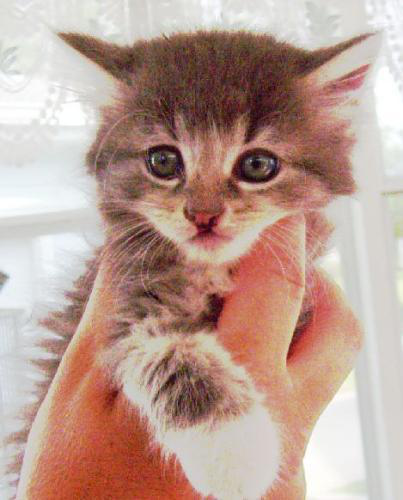

TypeError: ignored

In [30]:
import IPython.display as display
from PIL import Image
#display.display(Image.open('.//Cats_Dogs_data//test//Cats_100.jpg'))

i = Image.open('.//Cats_Dogs_data//test//Cats_100.jpg')
display.display(i)
i= i.resize((350, 350))
display.display(i)

In [28]:
iar = np.asarray(i)
iar

array([[[223, 224, 219],
        [223, 224, 219],
        [223, 224, 219],
        ...,
        [244, 244, 248],
        [247, 245, 250],
        [245, 243, 248]],

       [[222, 223, 218],
        [222, 223, 218],
        [222, 223, 218],
        ...,
        [245, 244, 249],
        [246, 245, 250],
        [247, 245, 250]],

       [[221, 222, 217],
        [222, 223, 218],
        [222, 223, 218],
        ...,
        [242, 243, 247],
        [245, 246, 250],
        [247, 248, 252]],

       ...,

       [[211, 215, 222],
        [210, 215, 221],
        [207, 213, 217],
        ...,
        [216, 212, 209],
        [216, 212, 211],
        [216, 212, 211]],

       [[208, 215, 221],
        [209, 216, 221],
        [206, 214, 217],
        ...,
        [216, 212, 209],
        [216, 212, 211],
        [216, 212, 211]],

       [[208, 215, 221],
        [209, 216, 221],
        [206, 214, 217],
        ...,
        [216, 212, 209],
        [216, 212, 211],
        [216, 212, 211]]

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


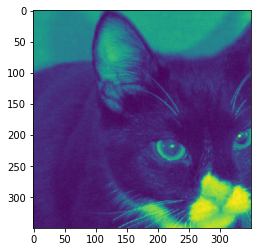

AttributeError: ignored

In [22]:
#!pip install rasterio

import rasterio
import rasterio.features
import rasterio.warp
from matplotlib import pyplot
from rasterio.plot import show
import pandas as pd
import numpy as np
from rasterio.windows import Window

with rasterio.open('.//Cats_Dogs_data//test//Cats_10001.jpg') as src:
    w = src.read(1, window=Window(0, 0, 350, 350))

show(w,0)

array=w.read()

array=w.read()

#img=rasterio.open(".//Cats_Dogs_data//test//Cats_100.jpg")
#show(img,0)

#read image 
#array=img.read()

#create np array
#array=np.array(array)

In [33]:
array

array([[[223, 223, 223, ..., 247, 246, 244],
        [223, 223, 223, ..., 247, 246, 246],
        [222, 222, 222, ..., 246, 246, 247],
        ...,
        [208, 209, 207, ..., 216, 216, 216],
        [208, 209, 207, ..., 216, 216, 216],
        [208, 209, 207, ..., 216, 216, 216]],

       [[224, 224, 224, ..., 245, 244, 242],
        [224, 224, 224, ..., 245, 244, 244],
        [223, 223, 223, ..., 245, 245, 246],
        ...,
        [215, 216, 215, ..., 212, 212, 212],
        [215, 216, 215, ..., 212, 212, 212],
        [215, 216, 215, ..., 212, 212, 212]],

       [[219, 219, 219, ..., 250, 249, 247],
        [219, 219, 219, ..., 250, 249, 249],
        [218, 218, 218, ..., 250, 250, 251],
        ...,
        [221, 222, 218, ..., 211, 211, 211],
        [221, 222, 218, ..., 211, 211, 211],
        [221, 222, 218, ..., 211, 211, 211]]], dtype=uint8)

In [38]:
import numpy
import rasterio
from matplotlib import pyplot
from rasterio.windows import Window

width = 350
height = 350

with rasterio.open(".//Cats_Dogs_data//test//Cats_100.jpg") as src:
    w = src.read(1, window=Window(0, 0, width, height))
    profile = src.profile
    profile['width'] = width
    profile['height'] = height
    # Create output
    result = numpy.full((width, height), dtype=profile['dtype'], fill_value=profile['nodata'])

result

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


TypeError: ignored

In [29]:
from sklearn.metrics import zero_one_loss

y_true = [1]
y_pred = model.predict(iar).ravel()
zero_one_loss(y_true, y_pred, normalize=False)


ValueError: ignored

In [28]:
import pandas as pd
pd_batch0 = df_cats.toPandas()
pd_batch0

Py4JJavaError: ignored

In [ ]:
df_comics = spark.read.format("image").load(".//Face_Comics_data//comics").withColumn("label", lit(int(1)))
df_comics = df_comics.select(col("image.data"),col("label"))

In [ ]:
#import pandas as pd
#pd_batch0 = train_df.toPandas()
#pd_batch0

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = pd.DataFrame({'id':xx_test,'label':yy_test}), 
    directory=train_dir, 
    x_col='id',
    y_col='label',
    #batch_size=batch_size,
    target_size=TARGET_SIZE,
    class_mode='binary',
    shuffle=False)

In [23]:
test_X

array(['Cats_4069.jpg', 'Cats_11044.jpg', 'Dogs_9871.jpg', ...,
       'Cats_1566.jpg', 'Cats_10789.jpg', 'Cats_6290.jpg'], dtype='<U14')

In [22]:
from sklearn.metrics import zero_one_loss

y_true = test_labels_s
y_pred = model.predict(test_X).ravel()
zero_one_loss(y_true, y_pred, normalize=False)


ValueError: ignored

In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

#predictions = (predictions - min(predictions)) / ( max(predictions)- min(predictions))
#predictions = np.random.uniform(-1, 1,12)

#predictions = tf.nn.sigmoid(predictions)
#predictions = tf.where(predictions > 0.51, 1, 0)
predictions

array([0.54735667, 0.37014982, 0.19914474, 0.3520912 , 0.5189715 ,
       0.7231875 , 0.556296  , 0.76940703, 0.45756906, 0.45084986,
       0.36924872, 0.3987768 , 0.4550795 , 0.9305877 , 0.51387334,
       0.4383488 , 0.46318626, 0.25220096, 0.8987313 , 0.54308945,
       0.46941397, 0.48927966, 0.8609631 , 0.39242685, 0.2790653 ,
       0.5354528 , 0.49158597, 0.49265915, 0.5316476 , 0.38318717,
       0.51743704, 0.61199087, 0.64912105, 0.5383641 , 0.56768864,
       0.4208544 , 0.5122613 , 0.4930925 , 0.49925166, 0.42634374,
       0.53847975, 0.56340575, 0.5367634 , 0.47395656, 0.34319946,
       0.40270385, 0.3479511 , 0.40514725, 0.5967939 , 0.4759806 ,
       0.33720008, 0.35755274, 0.52030027, 0.41355413, 0.48804492,
       0.5093468 , 0.6299228 , 0.4612274 , 0.4771779 , 0.572484  ,
       0.5024766 , 0.37528676, 0.546446  , 0.27898705], dtype=float32)

In [ ]:
from sklearn.metrics import zero_one_loss

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
#predictions = model.predict_on_batch(image_batch).flatten()

y_pred = model.predict(image_batch).ravel()
print(len(y_pred))
#y_pred = tf.nn.sigmoid(y_pred)
y_true = y_pred * random.random ()
y_true = tf.where(y_true > 0.51, 1, 0)
y_pred = tf.where(y_pred > 0.51, 1, 0)


zero_one_loss(y_true, y_pred)


64


0.296875

In [ ]:

# Test the model on all available devices.
model.evaluate(test_dataset)

23/23 [==============================] - 5s 158ms/step - loss: 0.4414 - accuracy: 0.8003


[0.4414014518260956, 0.80027174949646]

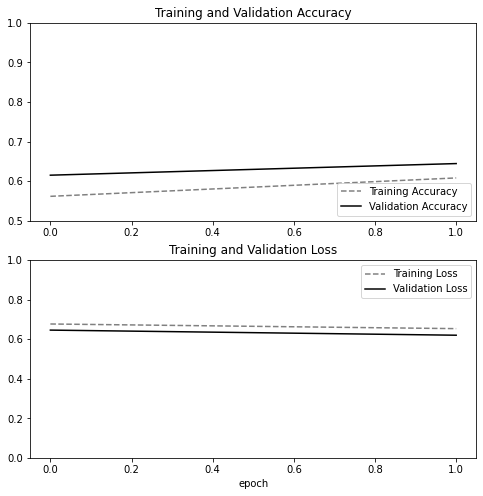

In [ ]:
from matplotlib import pyplot as plt

# summarize history for accuracy
# print(scores)
acc = []
val_acc = []
loss_ = []
val_loss_ = []

for s in scores:
    acc.append(s['acc'])
    val_acc.append(s['val_acc'])
    loss_.append(s['loss'])
    val_loss_.append(s['val_loss'])    


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color = 'gray',linestyle='dashed')
plt.plot(val_acc, label='Validation Accuracy', color = 'black')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_, label='Training Loss', color = 'gray',linestyle='dashed')
plt.plot(val_loss_, label='Validation Loss', color = 'black')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()